# L3 SSH animation

#### Imports

In [14]:
import os
import glob
import sys

import cartopy.geodesic as geod
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.geodesic import Geodesic

import numpy as np
import xarray as xr

sys.path.append(os.path.abspath(os.path.join('..', 'common_utils')))
from utils import *

import matplotlib
from matplotlib import pyplot as plt

####################################################################################

#path_fields = '../save_data/fields_data'
path_fields = '/home/bouxdecl/Documents/MEOM_internship_2024/Data_exploration'
ds = xr.open_dataset(os.path.join(path_fields, 'ds_swot_KE.nc'))

path_save_plot = '/home/bouxdecl/Documents/animation_sandbox'

ds

####################################################################################

<xarray.Dataset>
Dimensions:    (time: 105, y: 141, x: 417)
Coordinates:
  * time       (time) datetime64[ns] 2023-03-28 2023-03-29 ... 2023-07-10
    latitude   (y, x) float32 ...
    longitude  (y, x) float32 ...
Dimensions without coordinates: y, x
Data variables:
    ssh        (time, y, x) float32 ...
    u_geos     (time, y, x) float32 ...
    v_geos     (time, y, x) float32 ...
    u_var      (time, y, x) float32 ...
    v_var      (time, y, x) float32 ...
    u_geos_t   (time, y, x) float32 ...
    v_geos_t   (time, y, x) float32 ...
    u_var_t    (time, y, x) float32 ...
    v_var_t    (time, y, x) float32 ...
    KE_var     (time, y, x) float32 ...
    KE_geo     (time, y, x) float32 ...
Attributes:
    DATAPRODUCT:         MIOST_allnadirs-alg_and_SWOT
    spatial_resolution:  0
    gridtype_adt:        T grid : (latitude, longitude)
    gridtype_uv:         U grid

# Plots and save png's

In [26]:
############
test = False
############


plt.ioff()
if test:
    plt.ion()

for i, time in enumerate(ds.time.values[::2]):
    #ssh = ds.isel(time=i).ssh
    #data = ssh - np.nanmean(ssh)

    data = ds.isel(time=i).KE_var - ds.isel(time=i).KE_geo

    # Set up the figure and map projection
    fig = plt.figure(tight_layout=True, figsize=(8, 8))
    crs = ccrs.PlateCarree()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
    gl = ax.gridlines(draw_labels=True, )

    # Add land feature for better visualization
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)

    # Set the map extent
    ax.set_extent([0, 9, 36.5, 43.7], crs=crs)

    # Plot the density of points

    vmax = 0.25#np.nanmax(np.abs(data))
    vmin = 0


    data_field = ax.pcolormesh(ds.longitude, ds.latitude, data, transform=crs, cmap='Reds', vmin=vmin, vmax=vmax)

    # Add a color bar
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.6, axes_class=plt.Axes)
    cbar = plt.colorbar(data_field, cax=cax)
    #cbar.set_label('SSH (m)')
    cbar.set_label('KE (m/s)^2')

    strtime = str(time)[:10] + '_'+ str(time)[11:13] +'h'
    #ax.set_title('SSH field - mean (dataproduct={})\ntime : {}  ;  mean = {:.2}'.format(ds.DATAPRODUCT, strtime, float(ds.isel(time=i).ssh.mean())) )
    ax.set_title('Cyclogeostrophic KE \n{} with jaxparrow variational\n\ntime : {}\n'.format(ds.DATAPRODUCT, strtime))#, float(ds.isel(time=i).ssh.mean())) )

    if test:
        break

    plt.savefig(os.path.join(path_save_plot, '{}_{:03d}'.format(ds.DATAPRODUCT, i)), bbox_inches='tight', dpi = 300)

/tmp/ipykernel_29321/193059754.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(tight_layout=True, figsize=(8, 8))


### Animation with two plots for comparison

In [ ]:
vmax = 0.10 #np.nanmax(np.abs(data))
vmin = - vmax

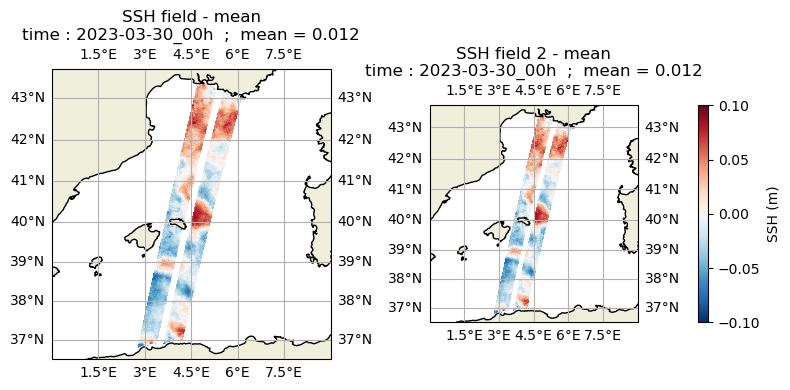

In [13]:
lon = ds.longitude
lat = ds.latitude

for i, time in enumerate(ds.time.values):
    ssh = ds.isel(time=i).ssh
    data = ssh - np.nanmean(ssh)

    # Set up the figure and map projection
    fig = plt.figure(tight_layout=True, figsize=(8, 8))
    crs = ccrs.PlateCarree()



    ### FIRST PLOT

    ax = fig.add_subplot(1, 2, 1, projection=ccrs.Mercator())
    gl = ax.gridlines(draw_labels=True, )

    # Add land feature for better visualization
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)

    # Set the map extent
    ax.set_extent([0, 9, 36.5, 43.7], crs=crs)

    # Plot the density of points
    ssh_field = ax.pcolormesh(lon, lat, data, transform=crs, cmap='RdBu_r', vmin=vmin, vmax=vmax)



    strtime = str(time)[:10] + '_'+ str(time)[11:13] +'h'
    ax.set_title('SSH field - mean\ntime : {}  ;  mean = {:.2}'.format(strtime, float(ds.isel(time=i).ssh.mean())) )

    

    ### SECOND PLOT

    ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.Mercator())
    gl = ax2.gridlines(draw_labels=True, )

    # Add land feature for better visualization
    ax2.add_feature(cfeature.LAND)
    ax2.add_feature(cfeature.COASTLINE)

    # Set the map extent
    ax2.set_extent([0, 9, 36.5, 43.7], crs=crs)

    # Plot the density of points
    ssh_field = ax2.pcolormesh(lon, lat, data, transform=crs, cmap='RdBu_r', vmin=vmin, vmax=vmax)

    # Add a color bar
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size="5%", pad=0.6, axes_class=plt.Axes)
    cbar = plt.colorbar(ssh_field, cax=cax)
    cbar.set_label('SSH (m)')

    strtime = str(time)[:10] + '_'+ str(time)[11:13] +'h'
    ax2.set_title('SSH field 2 - mean\ntime : {}  ;  mean = {:.2}'.format(strtime, float(ds.isel(time=i).ssh.mean())) )


    break

    ### SAVE
    plt.savefig(os.path.join(path_save_plot, '{}_{:03d}'.format(ds.DATAPRODUCT, i)), bbox_inches='tight', dpi = 300)

# Create an animation with the png's
Then go in the folder of the png's with names (prefix000, prefix0001...) and use the script of cloudporn :

 `images2mp4.sh -i prefix -f 2 -C 1`  
 
 -f is the fps and -C the image quality

